In [1]:
import pandas as pd
import numpy as np

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
# Load the data.

data = pd.read_csv('train.tsv', sep='\t')

In [3]:
# Take a look at the data.

print(data.shape)
data.head()

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
# Look at the numeric and non-numeric features.

# Numeric features

data.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [5]:
# Non-numeric features

data.describe(exclude='number').T

,count,unique,top,freq
name,1482535,1225273,Bundle,2232
category_name,1476208,1287,"Women/Athletic Apparel/Pants, Tights, Leggings",60177
brand_name,849853,4809,PINK,54088
item_description,1482531,1281426,No description yet,82489


In [6]:
# Are there any missing values?

data.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [7]:
# Remove rows that don't have a category name.

data = data[data['category_name'].notna()]
data = data[data['brand_name'].notna()]

In [8]:
# Check that there are no missing values in category name and brand name.

data.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     1
dtype: int64

In [9]:
# Drop columns that won't be used for feature engineering.

data = data.drop(columns=['train_id', 'name', 'item_description'])

In [10]:
data.head()

,item_condition_id,category_name,brand_name,price,shipping
1,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0
2,1,Women/Tops & Blouses/Blouse,Target,10.0,1
6,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0
7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1
8,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0


### Find the Top 100 selling brands.

In [11]:
# Top 100 brands

n = 100
top100 = data['brand_name'].value_counts()[:n].index.tolist()

In [12]:
# Filter the data by those brand names.

data = data[data['brand_name'].isin(top100)]

### Take a closer look at category name.

In [13]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

data['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings                       32880
Women/Tops & Blouses/T-Shirts                                        26875
Electronics/Video Games & Consoles/Games                             19485
Beauty/Makeup/Face                                                   14939
Women/Underwear/Bras                                                 14543
Beauty/Makeup/Lips                                                   14413
Women/Athletic Apparel/Shorts                                        13943
Men/Shoes/Athletic                                                   12279
Women/Tops & Blouses/Tank, Cami                                      10893
Women/Athletic Apparel/Shirts & Tops                                 10378
Women/Women's Handbags/Shoulder Bag                                  10160
Women/Women's Accessories/Wallets                                     9992
Women/Shoes/Athletic                                                  9981
Beauty/Makeup/Makeup Pale

In [14]:
data['category_name'].value_counts()[:298]

Women/Athletic Apparel/Pants, Tights, Leggings                       32880
Women/Tops & Blouses/T-Shirts                                        26875
Electronics/Video Games & Consoles/Games                             19485
Beauty/Makeup/Face                                                   14939
Women/Underwear/Bras                                                 14543
Beauty/Makeup/Lips                                                   14413
Women/Athletic Apparel/Shorts                                        13943
Men/Shoes/Athletic                                                   12279
Women/Tops & Blouses/Tank, Cami                                      10893
Women/Athletic Apparel/Shirts & Tops                                 10378
Women/Women's Handbags/Shoulder Bag                                  10160
Women/Women's Accessories/Wallets                                     9992
Women/Shoes/Athletic                                                  9981
Beauty/Makeup/Makeup Pale

In [15]:
# Categories that had at least 100 items sold.

n=298
cat = data['category_name'].value_counts()[:n].index.to_list()

In [16]:
# Filter the data by those categories.

data = data[data['category_name'].isin(cat)]

In [17]:
data.head()

,item_condition_id,category_name,brand_name,price,shipping
2,1,Women/Tops & Blouses/Blouse,Target,10.0,1
8,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0
11,1,Beauty/Fragrance/Women,Victoria's Secret,34.0,0
14,3,Women/Shoes/Boots,UGG Australia,43.0,0
15,1,Beauty/Makeup/Makeup Sets,Tarte,11.0,1


### Look at how the target is distributed.

In [18]:
# Look at the descriptive statisitcs of the target.

pd.options.display.float_format = '{:,.0f}'.format
data['price'].describe()

count   610,417
mean         32
std          45
min           0
25%          13
50%          20
75%          35
max       2,009
Name: price, dtype: float64

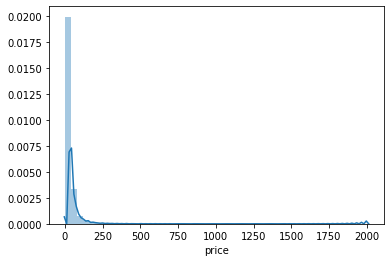

In [19]:
# Visualize the distribution of the target.

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(data['price']);

We see that the target has a right skew (the direction of the long tail).

In [20]:
# Remove outliers (the most extreme 1% in price).

data = data[(data['price'] >= np.percentile(data['price'], 0.5)) & 
               (data['price'] <= np.percentile(data['price'], 99.5))]

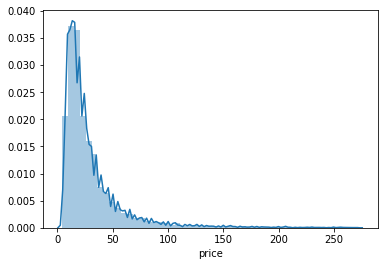

In [21]:
# Look at the distribution of price after removing outliers.

sns.distplot(data['price']);

In [22]:
# Take another look at the category name to verify that there are at least 100 comps per category.

data['category_name'].value_counts()

Women/Athletic Apparel/Pants, Tights, Leggings                       32840
Women/Tops & Blouses/T-Shirts                                        26720
Electronics/Video Games & Consoles/Games                             19346
Beauty/Makeup/Face                                                   14866
Women/Underwear/Bras                                                 14511
Beauty/Makeup/Lips                                                   14289
Women/Athletic Apparel/Shorts                                        13903
Men/Shoes/Athletic                                                   12147
Women/Tops & Blouses/Tank, Cami                                      10813
Women/Athletic Apparel/Shirts & Tops                                 10363
Women/Shoes/Athletic                                                  9964
Women/Women's Accessories/Wallets                                     9858
Women/Women's Handbags/Shoulder Bag                                   9834
Beauty/Makeup/Makeup Pale

In [23]:
# Categories that had at least 100 items sold.

n=297
cat = data['category_name'].value_counts()[:n].index.to_list()

In [24]:
# Filter the data by those categories.

data = data[data['category_name'].isin(cat)]

### Create main and sub categories from category name column.

In [25]:
# Create a main category.

data['main_category'] = data['category_name'].apply(lambda x: x.split('/')[0])

In [26]:
data.head()

,item_condition_id,category_name,brand_name,price,shipping,main_category
2,1,Women/Tops & Blouses/Blouse,Target,10,1,Women
8,3,Sports & Outdoors/Apparel/Girls,Nike,19,0,Sports & Outdoors
11,1,Beauty/Fragrance/Women,Victoria's Secret,34,0,Beauty
14,3,Women/Shoes/Boots,UGG Australia,43,0,Women
15,1,Beauty/Makeup/Makeup Sets,Tarte,11,1,Beauty


In [27]:
# Create a sub category.

data['sub_category'] = data['category_name'].apply(lambda x: x.split('/')[1])

In [28]:
# Create a sub-sub category.

data['sub_sub_category'] = data['category_name'].apply(lambda x: x.split('/')[2])

In [29]:
data.head()

,item_condition_id,category_name,brand_name,price,shipping,main_category,sub_category,sub_sub_category
2,1,Women/Tops & Blouses/Blouse,Target,10,1,Women,Tops & Blouses,Blouse
8,3,Sports & Outdoors/Apparel/Girls,Nike,19,0,Sports & Outdoors,Apparel,Girls
11,1,Beauty/Fragrance/Women,Victoria's Secret,34,0,Beauty,Fragrance,Women
14,3,Women/Shoes/Boots,UGG Australia,43,0,Women,Shoes,Boots
15,1,Beauty/Makeup/Makeup Sets,Tarte,11,1,Beauty,Makeup,Makeup Sets


In [30]:
# Combine the sub category and sub-sub category columns.

data['sub_category'] = data['sub_category'] + '/' + data['sub_sub_category']

In [31]:
data.head()

,item_condition_id,category_name,brand_name,price,shipping,main_category,sub_category,sub_sub_category
2,1,Women/Tops & Blouses/Blouse,Target,10,1,Women,Tops & Blouses/Blouse,Blouse
8,3,Sports & Outdoors/Apparel/Girls,Nike,19,0,Sports & Outdoors,Apparel/Girls,Girls
11,1,Beauty/Fragrance/Women,Victoria's Secret,34,0,Beauty,Fragrance/Women,Women
14,3,Women/Shoes/Boots,UGG Australia,43,0,Women,Shoes/Boots,Boots
15,1,Beauty/Makeup/Makeup Sets,Tarte,11,1,Beauty,Makeup/Makeup Sets,Makeup Sets


In [32]:
# Drop the original category name column and sub-sub category column.

data = data.drop(columns=['category_name', 'sub_sub_category'])

In [33]:
data.head()

,item_condition_id,brand_name,price,shipping,main_category,sub_category
2,1,Target,10,1,Women,Tops & Blouses/Blouse
8,3,Nike,19,0,Sports & Outdoors,Apparel/Girls
11,1,Victoria's Secret,34,0,Beauty,Fragrance/Women
14,3,UGG Australia,43,0,Women,Shoes/Boots
15,1,Tarte,11,1,Beauty,Makeup/Makeup Sets


In [34]:
# Verify that there are no missing values.

data.isnull().sum()

item_condition_id    0
brand_name           0
price                0
shipping             0
main_category        0
sub_category         0
dtype: int64

### Take a look at the shipping and item condition columns and create more defined features from them.

#### About the shipping and item condition id features:

##### Shipping: 1 - paid by seller, 0 - paid by buyer

##### Item Condition: poor (5), fair (4), good (3), like new (2), new (1)

In [35]:
data['item_condition_id'].value_counts()

1    219185
3    201104
2    166057
4     16542
5      1395
Name: item_condition_id, dtype: int64

In [36]:
data['shipping'].value_counts()

0    369977
1    234306
Name: shipping, dtype: int64

In [37]:
# Shipping

data.loc[data['shipping'] == 0, 'shipping'] = 'Buyer'
data.loc[data['shipping'] == 1, 'shipping'] = 'Seller'

In [38]:
# Item Condition

data.loc[data['item_condition_id'] == 1, 'item_condition'] = 'New'
data.loc[data['item_condition_id'] == 2, 'item_condition'] = 'Like New'
data.loc[data['item_condition_id'] == 3, 'item_condition'] = 'Good'
data.loc[data['item_condition_id'] == 4, 'item_condition'] = 'Fair'
data.loc[data['item_condition_id'] == 5, 'item_condition'] = 'Poor'

In [39]:
data.head()

,item_condition_id,brand_name,price,shipping,main_category,sub_category,item_condition
2,1,Target,10,Seller,Women,Tops & Blouses/Blouse,New
8,3,Nike,19,Buyer,Sports & Outdoors,Apparel/Girls,Good
11,1,Victoria's Secret,34,Buyer,Beauty,Fragrance/Women,New
14,3,UGG Australia,43,Buyer,Women,Shoes/Boots,Good
15,1,Tarte,11,Seller,Beauty,Makeup/Makeup Sets,New


In [40]:
# Drop original item condition column.

data = data.drop(columns=['item_condition_id'])

In [41]:
data.head()

,brand_name,price,shipping,main_category,sub_category,item_condition
2,Target,10,Seller,Women,Tops & Blouses/Blouse,New
8,Nike,19,Buyer,Sports & Outdoors,Apparel/Girls,Good
11,Victoria's Secret,34,Buyer,Beauty,Fragrance/Women,New
14,UGG Australia,43,Buyer,Women,Shoes/Boots,Good
15,Tarte,11,Seller,Beauty,Makeup/Makeup Sets,New


Create new csv files of the clean training and testing data.

In [42]:
# Create a new csv with the clean data.

data.to_csv('top100.csv', index=False)

In [43]:
# Load new train data.

top100 = pd.read_csv('top100.csv')

In [44]:
print(top100.shape)
top100.head()

(604283, 6)


,brand_name,price,shipping,main_category,sub_category,item_condition
0,Target,10,Seller,Women,Tops & Blouses/Blouse,New
1,Nike,19,Buyer,Sports & Outdoors,Apparel/Girls,Good
2,Victoria's Secret,34,Buyer,Beauty,Fragrance/Women,New
3,UGG Australia,43,Buyer,Women,Shoes/Boots,Good
4,Tarte,11,Seller,Beauty,Makeup/Makeup Sets,New
